In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


import requests

## Lectura de datos

In [18]:


# Obtener la fecha de inicio del usuario
#fecha_inicio_str = input("Ingrese la fecha de inicio (DD-MM-YYYY): ")
#fecha_inicio = datetime.strptime(fecha_inicio_str, "%d-%m-%Y")

# Obtener la fecha de fin del usuario
#fecha_fin_str = input("Ingrese la fecha de fin (DD-MM-YYYY): ")
#fecha_fin = datetime.strptime(fecha_fin_str, "%d-%m-%Y")

# Definir las dos fechas de inicio y fin
fecha_inicio = datetime(2020, 2, 1)
fecha_fin = datetime(2020, 4, 20)

# obtener primera fecha
link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"+fecha_inicio.strftime("%m-%d-%Y")+".csv"
df = pd.read_csv(link, index_col=0)

## remplazar columna que varia en DataFrame
contry = df.filter(regex="Country").columns.tolist()
df.rename(columns={contry[0]:"Country_Region"}, inplace=True)

Fecha = df.filter(regex="Last_").columns.tolist()
df.rename(columns={Fecha[0]:"Last Update"}, inplace=True)

# sumar un dia
fecha_inicio += timedelta(days=1)



# Recorrer todas las fechas en el intervalo
while fecha_inicio <= fecha_fin:

    try:
        
        link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"+fecha_inicio.strftime("%m-%d-%Y")+".csv"
        df2 = pd.read_csv(link,index_col=0)
        
        ## remplazar columna que varia en DataFrame
        contry = df2.filter(regex="Country").columns.tolist()
        Fecha = df2.filter(regex="Last_Update").columns.tolist()

        if len(contry) > 0:
            df2.rename(columns={contry[0]:"Country_Region"}, inplace=True)
        
        if len(Fecha) > 0:
            df2.rename(columns={Fecha[0]:"Last Update"}, inplace=True)

        df = pd.concat([df,df2],ignore_index=True)
        fecha_inicio += timedelta(days=1)
        print("La fecha", fecha_inicio.strftime("%m-%d-%Y"),"fue leida" )
    except:
        print("Error en en la fecha", fecha_inicio.strftime("%m-%d-%Y") )
        pass

df.reset_index(inplace=True)


IndexError: list index out of range

### 2. Información sobre el conjunto de datos (número de columnas, tipos de datos, entre otros). 

In [3]:
filas = str(df.shape[0])
columna = str(df.shape[1])

print("el conjunto de dato tiene "+filas+" filas y "+columna+" columnas")
print("\n\n")

print("Tipos de datos")
print(df.dtypes)




el conjunto de dato tiene 101139 filas y 15 columnas



Tipos de datos
index               int64
Country_Region     object
Last Update        object
Confirmed           int64
Deaths              int64
Recovered           int64
Latitude          float64
Longitude         float64
Admin2             object
Province_State     object
Last_Update        object
Lat               float64
Long_             float64
Active            float64
Combined_Key       object
dtype: object


In [10]:
df

,index,Country_Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Admin2,Province_State,Last_Update,Lat,Long_,Active,Combined_Key
0,0,Mainland China,2/1/2020 11:53,7153,249,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Mainland China,2/1/2020 10:53,599,0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mainland China,2/1/2020 14:23,535,0,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Mainland China,2/1/2020 1:52,422,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mainland China,2/1/2020 11:03,389,0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101134,101134,NaN,United Kingdom,0,1228,0,NaN,NaN,NaN,Wales,2020-04-20 23:36:47,52.1307,-3.7837,0.0,"Wales, United Kingdom"
101135,101135,NaN,Nauru,0,0,0,NaN,NaN,NaN,NaN,2020-04-20 23:36:47,-0.5228,166.9315,0.0,Nauru
101136,101136,NaN,New Zealand,0,0,0,NaN,NaN,NaN,Niue,2020-04-20 23:36:47,-19.0544,-169.8672,0.0,"Niue, New Zealand"
101137,101137,NaN,Tuvalu,0,0,0,NaN,NaN,NaN,NaN,2020-04-20 23:36:47,-7.1095,177.6493,0.0,Tuvalu


### 3. Información sobre los datos faltantes /inconsistentes dentro del conjunto de datos

In [12]:
datos_faltantes = df.isnull().sum()
datos_faltantes

index                 0
Country_Region        0
Last Update       92206
Confirmed             0
Deaths                0
Recovered             0
Latitude          95647
Longitude         95647
Admin2            17988
Province_State        0
Last_Update        8933
Lat               10130
Long_             10130
Active                0
Combined_Key       8933
dtype: int64

###  4. Número de casos confirmados, fallecidos, recuperados y activos por país/región

In [11]:

df["Recovered"].fillna(0,inplace=True)
df["Active"].fillna(0,inplace=True)
df["Province_State"].fillna("sin provi",inplace=True)

## replazar datos inconsistentes
df["Active"] = df["Active"].astype(int)
df["Recovered"] = df["Recovered"].astype(int)

#df["Province_State"].replace(np.nan, "Sin informacion" ,inplace=True)

## agrupar por pais/Reguib
Group4 = df.groupby(["Country_Region"])[["Confirmed","Deaths","Recovered","Active"]].sum()
Group4 

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Azerbaijan,1,0,0,0
Afghanistan,12122,359,915,10544
Albania,10817,538,4072,5689
Algeria,40812,5298,9870,25086
Andorra,14549,560,2043,11645
...,...,...,...,...
Winter Olympics 2022,0,0,0,0
Yemen,11,0,0,11
Zambia,1086,32,384,662


### 5. Número de casos confirmados, fallecidos y recuperados por país/región y provincia/estado

In [43]:
## agrupar por pais y privincie
Group5 = df.groupby(["Country_Region","Province_State"])[["Confirmed","Deaths","Recovered","Active"]].sum()
Group5

Confirmed  \
Country_Region Province_State                                            
Australia      Australian Capital Territory                     816374   
               New South Wales                                23676591   
               Northern Territory                               556192   
               Queensland                                      9658389   
               South Australia                                 2546611   
...                                                                ...   
United Kingdom Saint Helena, Ascension and Tristan da Cunha         80   
               Scotland                                       24939156   
               Turks and Caicos Islands                         116140   
               Unknown                                               0   
               Wales                                          15925724   

                                                             Deaths  \
Country_Region Province_State                                         
Australia      Australian Capital Territory                     601   
               New South Wales                                33338   
               Northern Territory                               161   
               Queensland                                      7043   
               South Australia                                 2905   
...                                                             ...   
United Kingdom Saint Helena, Ascension and Tristan da Cunha       0   
               Scotland                                      264490   
               Turks and Caicos Islands                         700   
               Unknown                                         5423   
               Wales                                         194181   

                                                             Recovered  Active  
Country_Region Province_State                                                   
Australia      Australian Capital Territory                        0.0     0.0  
               New South Wales                                     0.0     0.0  
               Northern Territory                                  0.0     0.0  
               Queensland                                          0.0     0.0  
               South Australia                                     0.0     0.0  
...                                                                ...     ...  
United Kingdom Saint Helena, Ascension and Tristan da Cunha        0.0     0.0  
               Scotland                                            0.0     0.0  
               Turks and Caicos Islands                            0.0     0.0  
               Unknown                                             0.0     0.0  
               Wales                                               0.0     0.0  

[617 rows x 4 columns]

### Número de casos confirmados, fallecidos, recuperados en China según provincia/estado.

In [10]:
df[df["Country_Region"] == "China"].groupby(["Province_State"])[["Confirmed","Deaths","Recovered","Active"]].sum()

,Confirmed,Deaths,Recovered,Active
Province_State,,,,
Anhui,3033,18,0,0
Beijing,4187,27,0,0
Chongqing,1850,18,0,0
Fujian,4489,3,0,0
Gansu,1236,6,0,0
Guangdong,13078,24,0,0
Guangxi,2865,6,0,0
Guizhou,484,6,0,0
Hainan,573,18,0,0


### 7. Número de casos confirmados, fallecidos, recuperados en USA según provincia/estado. 

In [11]:
df[df["Country_Region"] == "US"].groupby(["Province_State"])[["Confirmed","Deaths","Recovered","Active"]].sum()

,Confirmed,Deaths,Recovered,Active
Province_State,,,,
Alabama,3530081,52892,0,0
Alaska,641595,3295,0,0
American Samoa,479,0,0,0
Arizona,5410380,79719,0,0
Arkansas,2249255,30106,0,0
California,24208633,246151,0,0
Colorado,3972077,35928,0,0
Connecticut,2046165,30211,0,0
Delaware,718755,7719,0,0


### 8. Número de fallecidos por país

In [13]:
df.groupby(["Country_Region"])["Deaths"].sum()

Country_Region
Afghanistan             22489
Albania                 10127
Algeria                 19900
Andorra                   441
Angola                   5629
                        ...  
West Bank and Gaza      15796
Winter Olympics 2022        0
Yemen                    6218
Zambia                  11712
Zimbabwe                15961
Name: Deaths, Length: 201, dtype: int64

### 9. Listado de países que no cuentan con recuperados. 

In [66]:
Recovered_sum = df.groupby(["Country_Region"])["Recovered"].sum()
notRecovered = Recovered_sum[Recovered_sum == 0]
notRecovered

Country_Region
 Azerbaijan                       0
Antarctica                        0
Aruba                             0
Bahamas, The                      0
Botswana                          0
Cape Verde                        0
Cayman Islands                    0
Channel Islands                   0
Curacao                           0
Czech Republic                    0
East Timor                        0
Faroe Islands                     0
Gambia, The                       0
Greenland                         0
Guadeloupe                        0
Guam                              0
Guernsey                          0
Jersey                            0
Kiribati                          0
Korea, North                      0
MS Zaandam                        0
Martinique                        0
Mayotte                           0
Nauru                             0
North Ireland                     0
Palau                             0
Palestine                         0
Papua New Gui

### 10. Número de fallecidos por coronavirus por país.

In [68]:
Recovered_sum = df.groupby(["Country_Region"])["Recovered"].sum()
Recovered_sum

Country_Region
 Azerbaijan                          0
Afghanistan                        915
Albania                           4072
Algeria                           9870
Andorra                           2043
                                  ... 
Winter Olympics 2022                 0
Yemen                                0
Zambia                             384
Zimbabwe                            10
occupied Palestinian territory       0
Name: Recovered, Length: 242, dtype: int64

### 12. Top 10 de los países con más casos de coronavirus confirmados indicando su última fecha de actualización.

In [8]:
confirmed_sum = df.groupby(["Country_Region"])["Confirmed"].sum()
confirmed_sum.sort_values(ascending=False)[:10]
       

Country_Region
US                11203952
Italy              4182361
Spain              3890599
China              3415225
Germany            2967097
France             2497836
Mainland China     2435647
Iran               1877179
United Kingdom     1694100
Turkey             1073406
Name: Confirmed, dtype: int64

### 13. Gráfico de líneas (con diferentes colores) que muestre la cantidad de casos confirmados, fallecidos,recuperados y activos por país/región donde las muertes hayan superado los 50 casos

<function matplotlib.pyplot.show(close=None, block=None)>

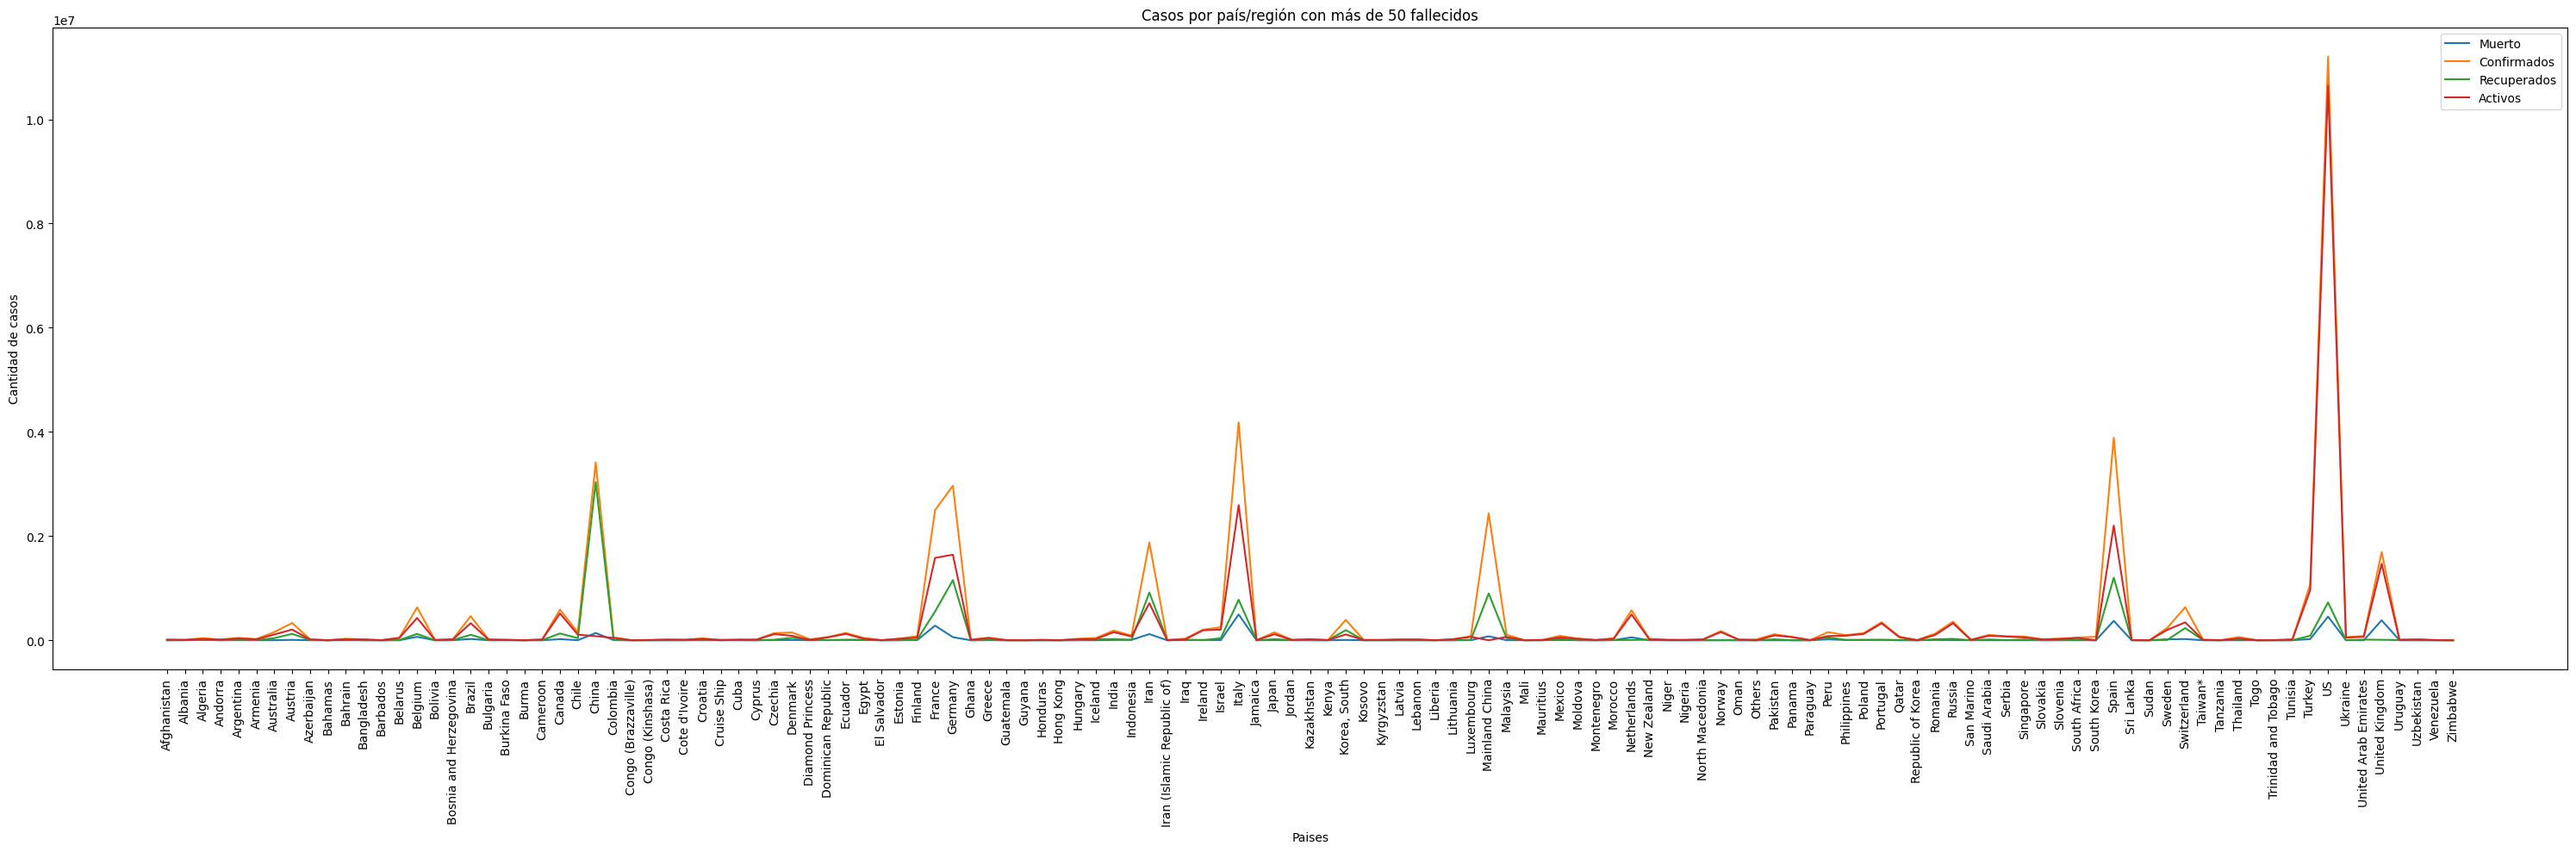

In [38]:
grafico_sum = df.groupby(["Country_Region"])[["Confirmed","Recovered","Deaths","Active"]].sum()
grafico_sum = grafico_sum[grafico_sum["Deaths"] > 50]


# Configurar el gráfico
plt.figure(figsize=(30, 10))
plt.title('Casos por país/región con más de 50 fallecidos')
plt.xlabel('Paises')
plt.ylabel('Cantidad de casos')

# Rotar las etiquetas del eje x
plt.xticks(rotation=90)


plt.plot(grafico_sum.index.tolist(),grafico_sum["Deaths"], label='Muerto' )
plt.plot(grafico_sum.index.tolist(),grafico_sum["Confirmed"], label='Confirmados' )
plt.plot(grafico_sum.index.tolist(),grafico_sum["Recovered"], label='Recuperados' )
plt.plot(grafico_sum.index.tolist(),grafico_sum["Active"], label='Activos' )


# Agregar la leyenda
plt.legend()

# Ajustar el diseño
plt.tight_layout()


plt.show

###  Gráfico de barras que muestre la cantidad de fallecidos confirmados por coronavirus según provincia/estado en USA.

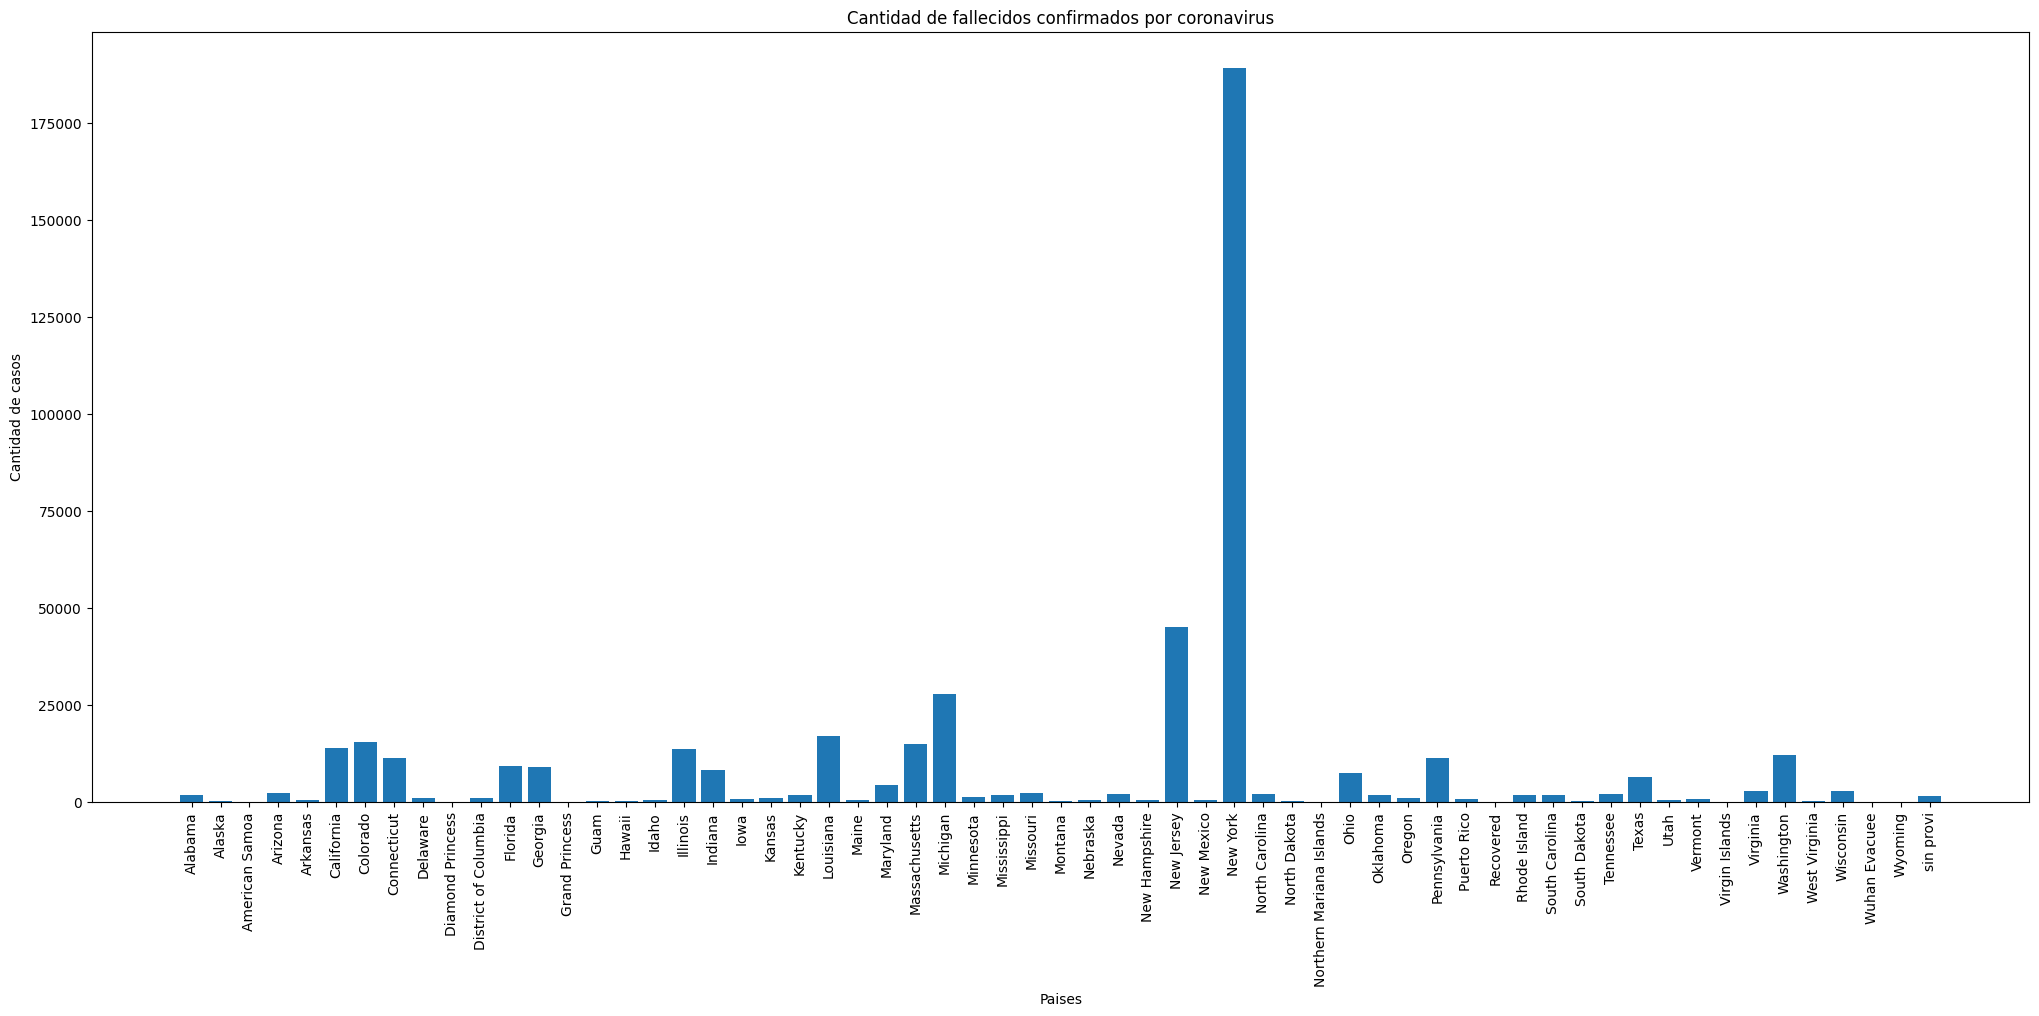

In [48]:
US_country = df[df["Country_Region"] == "US"].groupby(["Province_State"])[["Deaths"]].sum()

# Configurar el gráfico
plt.figure(figsize=(25, 10))
plt.title('Cantidad de fallecidos confirmados por coronavirus')
plt.xlabel('Paises')
plt.ylabel('Cantidad de casos')

plt.bar(US_country.index,US_country["Deaths"])

# Rotar las etiquetas del eje x
plt.xticks(rotation=90)

plt.show()

### 15. Gráfico de barras que muestre la cantidad de casos activos según provincia/estado en USA.

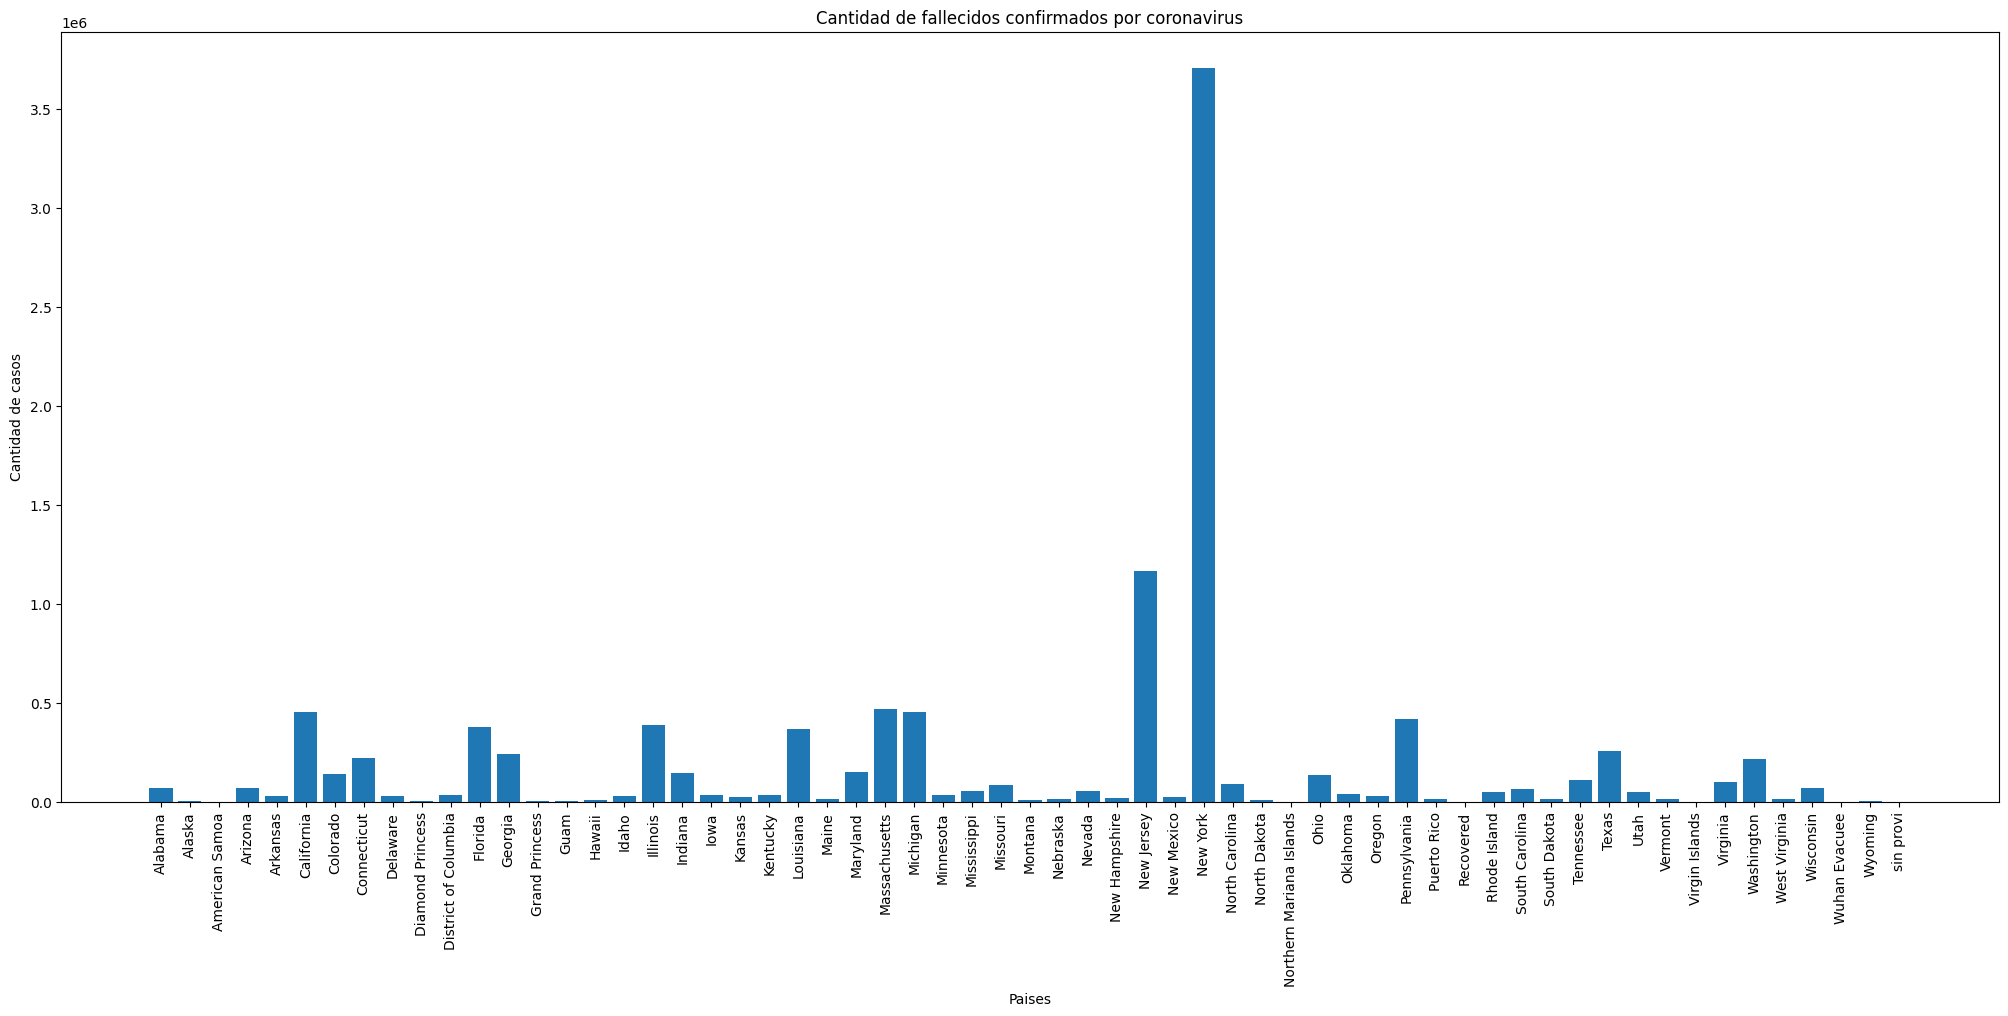

In [79]:
US_country = df[df["Country_Region"] == "US"].groupby(["Province_State"])[["Active"]].sum()
US_country
# Configurar el gráfico
plt.figure(figsize=(25, 10))
plt.title('Cantidad de fallecidos confirmados por coronavirus')
plt.xlabel('Paises')
plt.ylabel('Cantidad de casos')

plt.bar(US_country.index,US_country["Active"])

# Rotar las etiquetas del eje x
plt.xticks(rotation=90)

plt.show()

### 16. Gráfico de barras que compare la cantidad de casos confirmados, fallecidos, recuperados y activos según provincia/estado en USA.

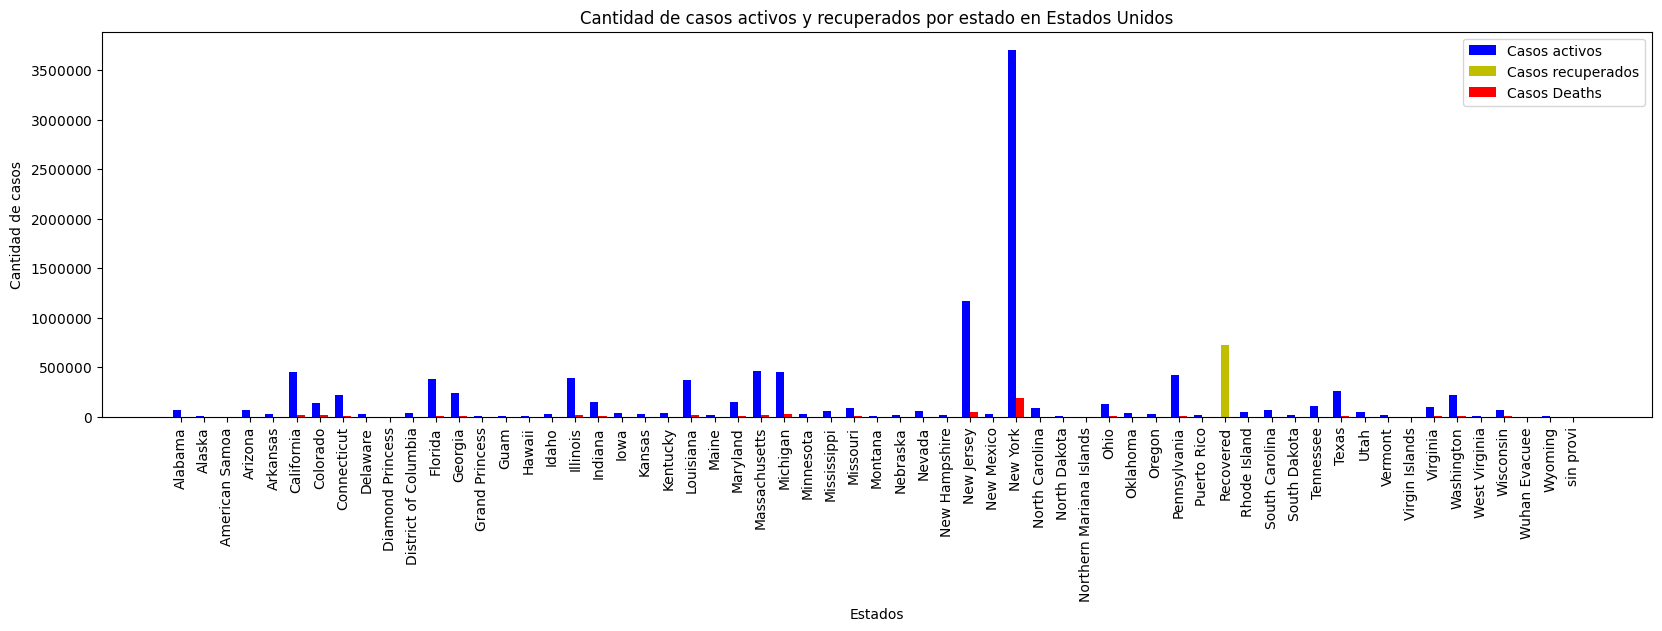

In [110]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

# Datos de ejemplo
US_country = df[df["Country_Region"] == "US"].groupby(["Province_State"])[["Recovered", "Active","Deaths"]].sum()

width = 0.35
x = np.arange(len(US_country.index))

# Configurar el gráfico
plt.figure(figsize=(20, 5))
plt.title('Cantidad de casos activos y recuperados por estado en Estados Unidos')
plt.xlabel('Estados')
plt.ylabel('Cantidad de casos')


# dibujar grafios
plt.bar(x - width/2, US_country["Active"], width, label='Casos activos',color="b")
plt.bar(x , US_country["Recovered"], width, label='Casos recuperados',color="y")
plt.bar(x + width/2, US_country["Deaths"], width, label='Casos Deaths',color="r")


plt.xticks(x, US_country.index, rotation=90)


formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

# Ajustar el diseño
plt.legend()

# Mostrar el gráfico
plt.show()

### 17. Gráfico que muestre la cantidad de casos confirmados en todo el mundo a través del tiempo según mes

In [ ]:
df[]

### 18. Número total de casos confirmados en todo el mundo. 

In [116]:
Casos_total_confirmado = df["Confirmed"].sum()
print("El total de casos confirmados en todo el mundo son : ",Casos_total_confirmado )

El total de casos confirmados en todo el mundo son :  44673478


### 19. Número total de fallecidos en todo el mundo

In [117]:
Casos_total_muerto = df["Deaths"].sum()
print("El total de casos muertos en todo el mundo son : ",Casos_total_muerto )


El total de casos muertos en todo el mundo son :  2790730


17. Gráfico que muestre la cantidad de casos confirmados en todo el mundo a través del tiempo según 
mes
20. Listado de país/región que experimentaron rebrotes (un día sin casos confirmados y luego la 
aparición de nuevos casos).
21. Se deben generar al menos 5 salidas adicionales que resuman la evolución del COVID a lo largo de 2 
años como mínimo, estas salidas deben ser creadas por usted y relacionar al menos 5 variables cada 
una además de la fecha.
22. Generar un reporte final usando Python, la idea es generar un pdf que explique en resumen lo 
descrito en el ítem 21 (estilo dashboard). 
